## 강의영상

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-wvV9xuYHvx0Gn7KDGNJbwj

## import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.experimental.numpy as tnp

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

### <font color='red'>basis가 orthogonal하냐?</font>

<font color='red'>overfitting 이슈는 변수가 많다고해서 무조건 발생하는 것은 아님! 변수가 많이 있어도 orthogonal하게 잘 넣으면 심지어 무한대의 basis를 갖고있어도 overfitting이슈가 발생하지 않는다. 이렇게 맞추는 것을 semi-parametric modeling 이라고 한다!</font>

- ex. 직선의 basis: 절편과 기울기

## 중간고사 관련 잡담

### 중간고사 3번문제

`-` 특이한모형: 오버핏이 일어날 수 없는 모형이다.
- 유의미한 coef: 상수항(bias), $\cos(t)$의 계수, $\cos(2t)$의 계수, $\cos(5t)$의 계수.
- 유의미하지 않은 coef: $\cos(3t)$의 계수, $\cos(4t)$의 계수
- 유의미하지 않은 계수는 $n%$이 커질수록 0으로 추정된다 =  $\cos(3t)$와 $\cos(5t)$는 사용자가 임의로 제외하지 않아도 결국 모형에서 알아서 제거된다 = overfit이 일어나지 않는다. 모형이 알아서 유의미한 변수만 뽑아서 fit하는 느낌

`-` 3번문제는 overfit이 일어나지 않는다. 이러한 신기한 일이 일어나는 이유는 모든 설명변수가 직교하기 때문임.
- 이런 모형의 장점: overfit이 일어날 위험이 없으므로 train/test로 나누어 학습할 이유가 없다. (샘플만 버리는 꼴, test에 빼둔 observation까지 모아서 학습해 $\beta$를 좀 더 정확히 추론하는게 차라리 더 이득)
- 이러한 모형에서 할일: 추정된 계수들이 0인지 아닌지만 test하면 된다. (이것을 유의성검정이라고 한다)

`-` 직교기저의 예시
- 빨강과 파랑을 255,255만큼 섞으면 보라색이 된다.
- 빨강과 파랑과 노랑을 각각 255,255,255만큼 섞으면 검은색이 된다.
- 임의의 어떠한 색도 빨강,파랑,노랑의 조합으로 표현가능하다. 즉 $\text{color}= \text{red}*\beta_1 + \text{blue}*\beta_2 + \text{yellow}*\beta_3$ 이다.
- (빨,파,노)는 색을 표현하는 basis이다. (적절한 $\beta_1,\beta_2,\beta_3$을 구하기만 하면 임의의 색도 표현가능)
- (빨,보,노)역시 색을 표현하는 basis라 볼 수 있다. (파란색이 필요할때 보라색-빨간색을 하면되니까)
- (빨,보,검)역시 색을 표현하는 basis라 볼 수 있다. (파란색이 필요하면 보라색-빨간색을 하면되고, 노란색이 필요하면 검정색-보라색을 하면 되니까)
- (빨,파,노)는 직교기저이다.

`-` 3번에서 알아둘 것: (1) 직교기저의 개념 (추후 재설명) (2) 임의의 색을 표현하려면 3개의 basis가 필요함

### 중간고사 1-(3)번 문제

`-` 그림을 그려보자.

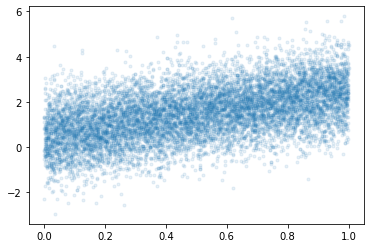

In [21]:
_x= tf.constant(np.arange(1,10001)/10000)
_y= tnp.random.randn(10000) + (0.5 + 2*_x)
plt.plot(_x,_y,'.',alpha=0.1)

`-` 저것 꼭 10000개 다 모아서 loss계산해야할까?

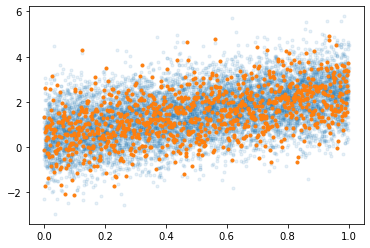

In [22]:
plt.plot(_x,_y,'.',alpha=0.1)
plt.plot(_x[::10],_y[::10],'.') # 10씩 jump해서 점이 찍힘.

`-` 대충 이정도만 모아서 해도 비슷하지 않을까? $\to$ 해보자!

- 주황색만가지고 기울기, 절편 추론을 해보자.

## 경사하강법과 확률적경사하강법

원래 확률적경사하강법이 딥러닝을 하려고 만든것이 아니다.(만들어진 의도와 사용이 다름) 그런데 거기에 맞게 진화를 한 것. 그래서 되게 헷갈린다...

### ver1: 모든 샘플을 사용하여 slope계산 (gradient descent)

`-` 단순회귀분석에서 샘플 10개 관측: $(x_1,y_1),\dots,(x_{10},y_{10})$.

(epoch1) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$

...

for문 이 3번 돌아감.

### ver2: 하나의 샘플만 사용하여 slope계산

(epoch1)
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_2-\beta_0-\beta_1x_2)^2 \quad \to \quad slope \quad \to \quad update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

(epoch2)
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_2-\beta_0-\beta_1x_2)^2 \quad \to \quad slope \quad \to \quad update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

...

for문이 30번 돌아감.

### ver3: $m(\leq n)$개의 샘플만 사용하여 slope계산 (mini-batch)

$m=3$이라고 하자.

(epoch1)
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

1,2,3번 observation들만 뽑아서 loss를 계산해서 그것만가지고 update $\to$ 4,5,6먼만 가지고 loss계산해서 update $\to$ 7,8,9를가지고 loss구하고 업데이트 $\to$ 남은 하나가지고 loss구하고 업데이트... // 한 에폭 끝!


(epoch2)
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

...

### 용어의 정리

#### 옛날 (좀 더 엄밀)

`-` ver1: gradient descent, batch gradient descent


`-` ver2: stochastic gradient descent

`-` ver3: mini-batch gradient descent, mini-batch stochastic gradient descent

#### 요즘

`-` ver1: gradient descent


`-` ver2: stochastic gradient descent with batch size = 1

`-` ver3: stochastic gradient descent
- https://www.deeplearningbook.org/contents/optimization.html, 알고리즘 8-1 참고.

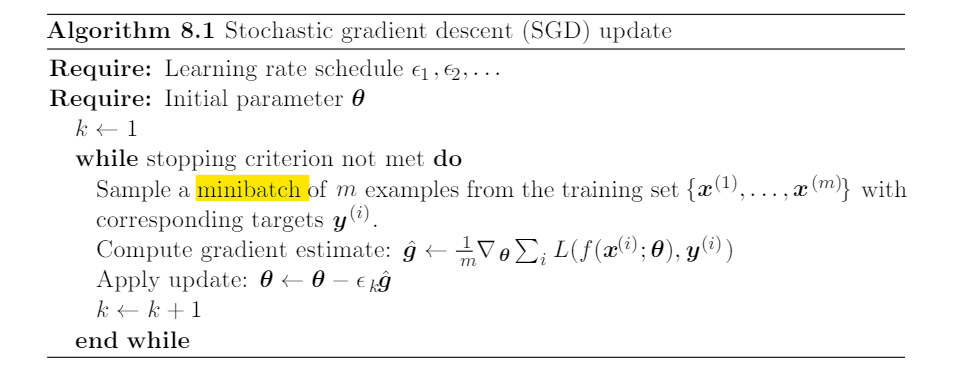

지금은 mini-batch가 포함된 방법을 stochastic gradient descent라고 부른다. 왜냐하면 1,2는 사장된 방법. 버전 3만 쓴다.(유명한 사람들이 학회에서 그렇게 부르기 시작했음.)

note: 이렇게 많이 쓰는 이유? ver1,2는 사실상 없는 방법이므로

### ver1,2,3 이외에 좀 더 지저분한 것들이 있다.

`-` ver2,3에서 샘플을 셔플할 수도 있다.

`-` ver3에서 일부 샘플이 학습에 참여 안하는 버전도 있다.

`-` 개인적 생각: 크게3개정도만 알면 괜찮고 나머지는 그렇게 유의미하지 않아보인다.

### Discussion

`-` 핵심개념


- **메모리사용량^[한 번 업데이트 할 때 드는 계산량]: ver1 > ver3 > ver2**
- 계산속도: ver1 > ver3 > ver2
- local-min에 갇힘: ver1 > ver3 > ver2

로컬미니멈에 갇힌가는 건 로컬미니멈을 잘 찾는다라고 생각 (정신이 제대로 박힌애)

대충대충 학습하면 로컬미니멈에서 딱 멈춰야하는데 대충대충 계산해서 기울기가 딱 $0$이 안나오는 것. (운 좋게 탈출하는 경우도 있음.)

`-` 본질: GPU 메모리가 한정되어 있어서 ver1을 쓰지는 못한다. GPU 메모리를 가장 적게쓰는것은 ver2인데 이것은 너무 불안정하다.

`-` 틀리진 않지만 어색한 블로그 정리 내용들


- 경사하강법은 종종 국소최소점에 갇히는 문제가 있다. 이를 해결하기 위해서 등장한 방법이 확률적 경사하강법이다. --> 영 틀린말은 아니지만 그걸 의도하고 만든건 아님 (이건 side effect)

- 경사하강법은 계산시간이 오래걸린다. 계산을 빠르게 하기 위해서 등장한 방법이 확률적 경사하강법이다. --> 1회 업데이트는 빠르게 계산함. 하지만 그것이 최적의 $\beta$를 빠르게 얻을 수 있다는 의미는 아님


<font color='blue'>원래 경사하강법은 local minimum에 빠지기 쉬운 알고리즘! 그런데 그나마 둘 중에 비교를 하자면 확률적으로 하면 로컬 미니멈에 빠졌다가 어쩌다 운좋아서 튀어 나가는 경우가 있다.</font>


동일한 컴퓨터 자원으로 수렴을 더 빨리 시킬 수 있냐? 그건 아님 (그건 모름).

그럼 왜 쓰냐???

메모리 사용량만 보면 됩니다!

## fashion_mnist 모듈

### tf.keras.datasets.fashion_mnist.load_data()

`-` tf.keras.datasets.fashion_mnist.load_data 의 리턴값 조사

In [12]:
tf.keras.datasets.fashion_mnist.load_data??

Signature: tf.keras.datasets.fashion_mnist.load_data()
Source:   
@keras_export("keras.datasets.fashion_mnist.load_data")
def load_data():
    """Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **y_train**: uint8 NumPy array of labels (integers in ra

### 데이터생성 및 탐색

`-` tf.keras.datasets.fashion_mnist.load_data()를 이용한 데이터 생성

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


`-` 차원확인

In [15]:
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- 60000은 obs숫자인듯
- (28,28)은 28픽셀,28픽셀을 의미하는듯
- train/test는 6:1로 나눈것 같음

`-` 첫번째 obs

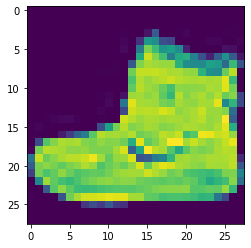

In [17]:
plt.imshow(x_train[0])

In [18]:
y_train[0]

9

- 첫번쨰 obs에 대응하는 라벨

`-` 첫번째 obs와 동일한 라벨을 가지는 그림을 찾아보자.

In [ ]:
np.where(y_train==9)

(array([    0,    11,    15, ..., 59932, 59970, 59978]),)

In [ ]:
y_train[11]

9

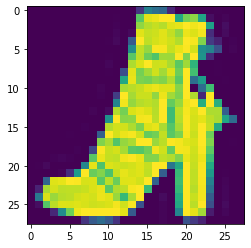

In [ ]:
plt.imshow(x_train[11])

### 데이터구조

`-` ${\bf X}$: (n,28,28)

`-` ${\bf y}$: (n,) , $y=0,1,2,3,\dots,9$

## 예제1

### 데이터 정리

`-` y=0,1에 대응하는 이미지만 정리하자. (우리가 배운건 로지스틱이니까)

In [ ]:
y= y_train[(y_train==0) | (y_train==1)].reshape(-1,1)
X= x_train[(y_train==0) | (y_train==1)].reshape(-1,784)
yy= y_test[(y_test==0) | (y_test==1)].reshape(-1,1)
XX= x_test[(y_test==0) | (y_test==1)].reshape(-1,784)

In [ ]:
X.shape, y.shape, XX.shape, yy.shape

((12000, 784), (12000, 1), (2000, 784), (2000, 1))

### 풀이1: 은닉층을 포함한 신경망  // epochs=100

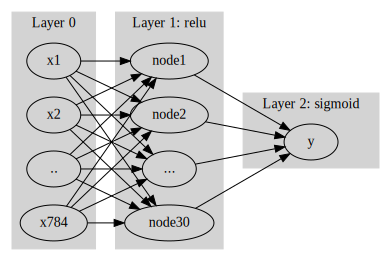

In [ ]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"

    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"

    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "y"
    "node2" -> "y"
    "..." -> "y"
    "node30" -> "y"
    label = "Layer 2: sigmoid"
}
''')

In [ ]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='sgd',loss=tf.losses.binary_crossentropy)
net.fit(X,y,epochs=100,batch_size=12000)

Epoch 1/100
1/1 [==============================] - 0s 122ms/step - loss: 220.9145
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 6800.3174
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7045
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7012
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7004
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6997
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6991
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6985
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6979
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6976
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6973
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6970
Epoch 13/100
1/1 [==============================] - 0s

In [ ]:
np.mean((net(X)>0.5) == y)

0.5000833333333333

In [ ]:
np.mean((net(XX)>0.5) == yy)

0.5

### 풀이2: 옵티마이저 개선

In [ ]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy)
net.fit(X,y,epochs=100,batch_size=12000)

Epoch 1/100
1/1 [==============================] - 0s 138ms/step - loss: 220.9145
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 88.9490
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5895
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 33.7521
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 40.2290
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 28.9675
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 16.5128
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4911
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.2027
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 5.2417
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 5.5172
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 6.5900
Epoch 13/100
1/1 [==============================

In [ ]:
np.mean((net(X)>0.5) == y)

0.98125

In [ ]:
np.mean((net(XX)>0.5) == yy)

0.977

### 풀이3: 컴파일시 metrics=['accuracy'] 추가

In [ ]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=100,batch_size=12000)

Epoch 1/100
1/1 [==============================] - 0s 150ms/step - loss: 220.9145 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 88.9490 - accuracy: 0.5073
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5895 - accuracy: 0.8208
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 33.7521 - accuracy: 0.5972
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 40.2290 - accuracy: 0.5723
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 28.9675 - accuracy: 0.6442
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 16.5128 - accuracy: 0.8061
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4911 - accuracy: 0.8947
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.2027 - accuracy: 0.9355
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 5.2417 - accuracy: 0.9404
Epoch 11/100
1/1 [

In [ ]:
net.evaluate(X,y)

375/375 [==============================] - 0s 349us/step - loss: 0.4860 - accuracy: 0.9812


[0.48598653078079224, 0.981249988079071]

In [ ]:
net.evaluate(XX,yy)

63/63 [==============================] - 0s 617us/step - loss: 0.4294 - accuracy: 0.9770


[0.42936256527900696, 0.9769999980926514]

### 풀이4: 확률적경사하강법 이용 // epochs=10

In [ ]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=10,batch_size=120)

Epoch 1/10
100/100 [==============================] - 0s 827us/step - loss: 5.6484 - accuracy: 0.9418
Epoch 2/10
100/100 [==============================] - 0s 747us/step - loss: 0.5078 - accuracy: 0.9793
Epoch 3/10
100/100 [==============================] - 0s 734us/step - loss: 0.3784 - accuracy: 0.9818
Epoch 4/10
100/100 [==============================] - 0s 765us/step - loss: 0.3390 - accuracy: 0.9828
Epoch 5/10
100/100 [==============================] - 0s 735us/step - loss: 0.2474 - accuracy: 0.9857
Epoch 6/10
100/100 [==============================] - 0s 717us/step - loss: 0.2116 - accuracy: 0.9870
Epoch 7/10
100/100 [==============================] - 0s 734us/step - loss: 0.1724 - accuracy: 0.9889
Epoch 8/10
100/100 [==============================] - 0s 784us/step - loss: 0.1711 - accuracy: 0.9880
Epoch 9/10
100/100 [==============================] - 0s 795us/step - loss: 0.1491 - accuracy: 0.9894
Epoch 10/10
100/100 [==============================] - 0s 723us/step - loss: 0.155

In [ ]:
net.evaluate(X,y)

375/375 [==============================] - 0s 339us/step - loss: 0.1124 - accuracy: 0.9923


[0.11242959648370743, 0.9922500252723694]

In [ ]:
net.evaluate(XX,yy)

63/63 [==============================] - 0s 566us/step - loss: 0.2988 - accuracy: 0.9845


[0.29883989691734314, 0.984499990940094]